# Imports




In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install ipynb
import sys
sys.path.insert(0,'/content/drive/MyDrive/CNN-deterministic-decoupling')
path = '/content/drive/MyDrive/CNN-deterministic-decoupling'
import numpy as np
import torch
from ipynb.fs.defs.imageFunctions import prepare_image,show_image,save_image
from ipynb.fs.defs.DISTS_mod import DISTS
from PIL import Image
import matplotlib.pyplot as plt
import math

Mounted at /content/drive






# Sintesis Adam

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
target = prepare_image(Image.open(path+"/imagenes/texture4.jpg").convert("RGB"),size=256)
target=target.to(device)
target.requires_grad_(False)
show_image(target)


origin=prepare_image(Image.open(path+"/imagenes/ruido3.png").convert("RGB"),size=256)
show_image(origin)

origin=origin.to(device)
origin.requires_grad_(True)

LossList=[]

model_d = DISTS().to(device)
model_d.set_target(target)
count = 0


loss=model_d.forward(origin).item()
LossList=[loss]
count+=1

optimizer = torch.optim.Adam([{"params": [origin],"lr": 0.001}])
stopping_criterion=0.0005

while LossList[-1] > stopping_criterion:
    optimizer.zero_grad()
    loss=model_d.forward(origin)
    loss.backward()
    optimizer.step()
    LossList.append(loss.item())
    count+=1

    if count % 2000 == 0:
      #learnrate = 0.5/np.sqrt(count)
      #optimizer = torch.optim.Adam([origin], lr = learnrate)
      show_image(origin)
      print("loss "+str(loss))
      print("iteracion "+str(count))
      save_image(origin,path+'/Datos/sintesis_4_Adam.png')
      with open(path+'/Datos/sintesis_4_Adam.txt', 'w') as f:
        f.write(f'Total iterations: {count}\n')
        f.write('\n')
        f.write(f'Loss values: {LossList}\n')

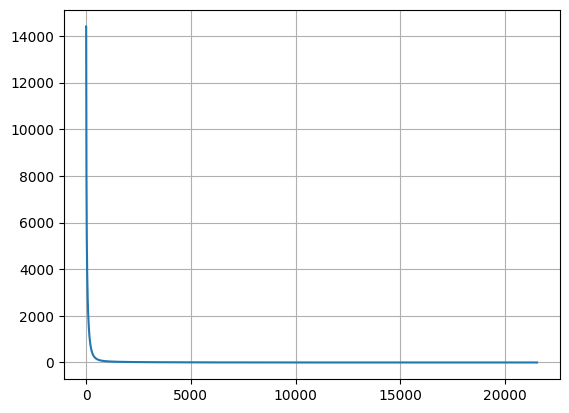

In [5]:
plt.plot(range(count),LossList)
plt.grid(True)